# Fig.1 Prepocessing

# Parcellation
* Glasser Parcellation 
* Cole Anticevic Networks

In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import brainspace
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_conte69
from mlxtend.evaluate import permutation_test
import nibabel as nib
from matplotlib.colors import ListedColormap
import hcp_utils as hcp

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
glasser = '../data/glasser.csv'
glasser = genfromtxt(glasser)
glasser[:32492].min(),glasser[:32492].max(),glasser[:32492].shape

(0.0, 180.0, (32492,))

In [3]:
glasser_r = glasser[32492:] - 180
glasser_l = glasser[:32492]
glasser = np.concatenate((glasser_l,glasser_r))
glasser[np.where(glasser==0)]=np.nan

In [4]:
cmap = []
for value in hcp.mmp['rgba'].values():
    cmap.append(value)
color_h = ListedColormap(cmap[1:181])

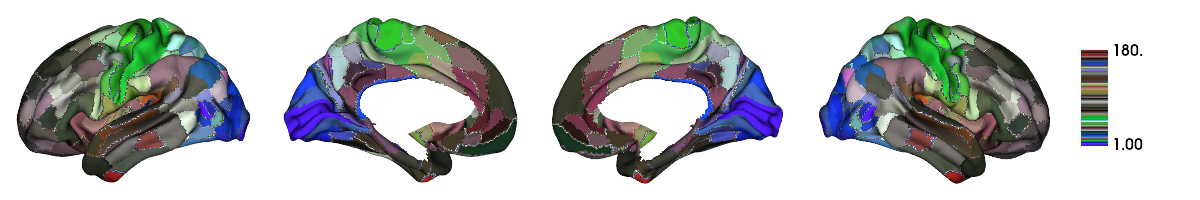

In [5]:
plot_hemispheres(surf_lh, surf_rh, array_name = glasser,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = color_h, color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_1_glasser.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = glasser,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = color_h, color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

In [6]:
ca = np.array(pd.read_csv('../data/ca_glasser_network.csv',header=None))[:,0].astype(float)
cmap = ListedColormap(np.vstack((list(hcp.ca_network['rgba'].values())))[1:])

In [7]:
from brainspace.utils.parcellation import map_to_labels
labeling_file = '../data/glasser.csv'
labeling = genfromtxt(labeling_file)
mask = labeling != 0 

In [8]:
ca_v = map_to_labels(ca, labeling, mask=mask)
ca_v[np.where(ca_v==0)] = np.nan

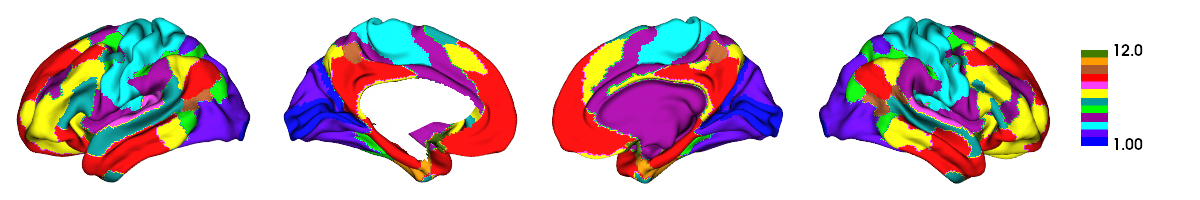

In [9]:
plot_hemispheres(surf_lh, surf_rh, array_name = ca_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = cmap, color_bar = True, #color_range = (0, 12),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_1_ca_network.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = ca_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = cmap, color_bar = True, #color_range = (0, 12),
                 interactive = False, zoom = 1.5, embed_nb = True)

### plot examplary fMRI time series

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fname = '../data/data_raw/hcp-functional-connectivity/100206/'\
        'MNINonLinear/Results/rfMRI_REST2_LR/rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii'
img   = nib.load(fname)
data = img.get_fdata()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


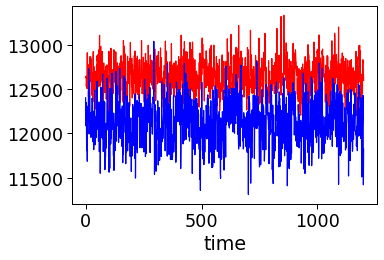

In [11]:
sns.set_context("paper", font_scale=2)
plt.plot(data[:,0], 'r')
plt.plot(data[:,7], 'b')
plt.xlabel('time')
plt.tight_layout()
plt.savefig('../figures/fig_1_ts.svg',dpi=300, format = 'svg')

### load the functional connectivity (FC) matrices for the 4 fashions:
### LL, RR, LR, RL

In [12]:
import pandas as pd
from nilearn import plotting

In [13]:
fc_LL = np.array(pd.read_csv('../data/data_results/FC/LL_groupmean.csv',header=None))
fc_RR = np.array(pd.read_csv('../data/data_results/FC/RR_groupmean.csv',header=None))
fc_LR = np.array(pd.read_csv('../data/data_results/FC/LR_groupmean.csv',header=None))
fc_RL = np.array(pd.read_csv('../data/data_results/FC/RL_groupmean.csv',header=None))

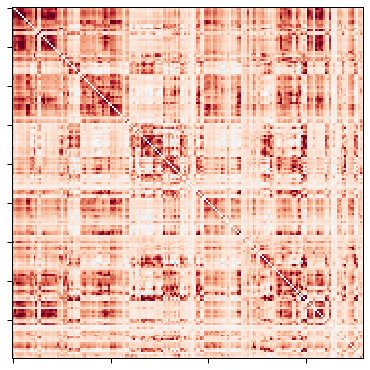

In [14]:
plotting.plot_matrix(fc_LL,figure=(5,5), vmax=0.6,vmin=-0.6,
                     reorder = False, colorbar = False)
plt.savefig('../figures/fig_1_fc_ll.svg')

### read-in and visualize the template gradients from LL intra-hem. FC

In [15]:
g1 = np.array(pd.read_csv('../data/data_results/gradient/group_grad_LL.csv',header=None))[:,0]
g2 = np.array(pd.read_csv('../data/data_results/gradient/group_grad_LL.csv',header=None))[:,1]
g3 = np.array(pd.read_csv('../data/data_results/gradient/group_grad_LL.csv',header=None))[:,2]

In [16]:
from brainspace.utils.parcellation import map_to_labels
labeling_file = '../data/glasser.csv'
labeling = genfromtxt(labeling_file)
mask = labeling != 0
mymask = np.ones((64984,)).astype('bool')
mymask[np.where(mask == False)[0]] = False
mymask[np.where(mask == False)[0] + 32492] = False

zero = [0] * 180
nan = np.array(zero)
g1 = np.concatenate((g1,zero))
g2 = np.concatenate((g2,zero))
g3 = np.concatenate((g3,zero))

g1_v = map_to_labels(g1, labeling, mask=mymask)
g1_v[np.where(g1_v==0)] = np.nan
g2_v = map_to_labels(g2, labeling, mask=mymask)
g2_v[np.where(g2_v==0)] = np.nan
g3_v = map_to_labels(g3,labeling, mask=mymask)
g3_v[np.where(g3_v==0)] = np.nan

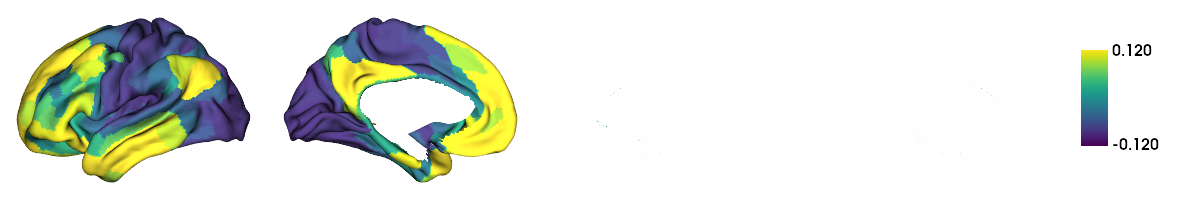

In [17]:
plot_hemispheres(surf_lh, surf_rh, array_name = g1_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, color_range = (-0.12, 0.12),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_1_ll_g1.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = g1_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, color_range = (-0.12, 0.12),
                 interactive = False, zoom = 1.5, embed_nb = True)

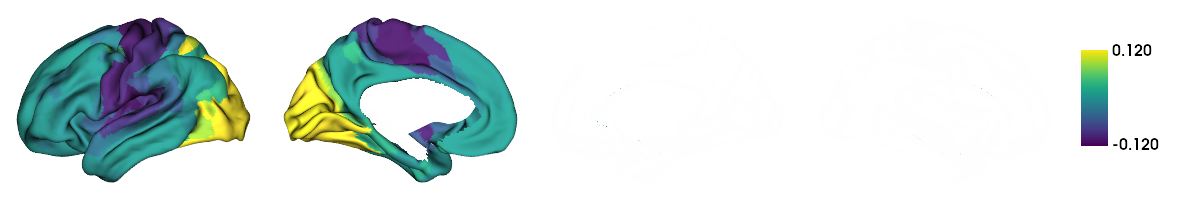

In [18]:
plot_hemispheres(surf_lh, surf_rh, array_name = g2_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, color_range = (-0.12, 0.12),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_1_ll_g2.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = g2_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, color_range = (-0.12, 0.12),
                 interactive = False, zoom = 1.5, embed_nb = True)

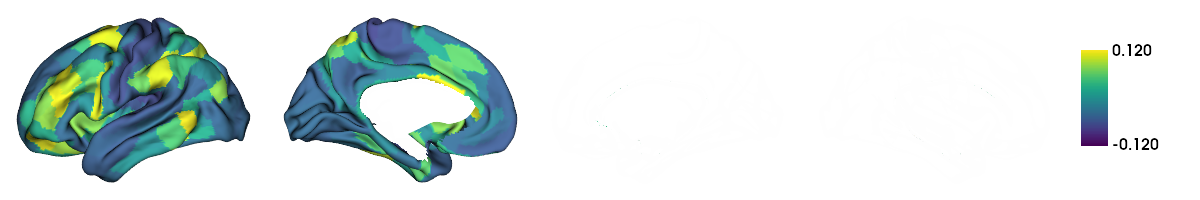

In [19]:
plot_hemispheres(surf_lh, surf_rh, array_name = g3_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, color_range = (-0.12, 0.12),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_1_ll_g3.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = g3_v,
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, color_range = (-0.12, 0.12),
                 interactive = False, zoom = 1.5, embed_nb = True)

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

color = np.concatenate((ca[:180],zero))

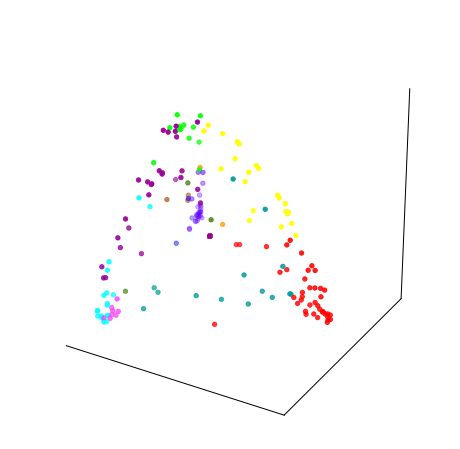

In [21]:
sns.set_context("paper", font_scale = 2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((1, 1, 1, 0))
ax.w_yaxis.set_pane_color((1, 1, 1, 0))
ax.w_zaxis.set_pane_color((1, 1, 1, 0))
ax.set_xticks(np.arange(-0.12, 0.12, 0.04))
ax.set_yticks(np.arange(-0.12, 0.12, 0.04))
ax.set_zticks(np.arange(-0.12, 0.12, 0.04))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.scatter(g1, g2, g3, s = 20, c = ca, cmap=cmap, marker = 'o')

fig.savefig('../figures/fig_1_ll_3d.svg')

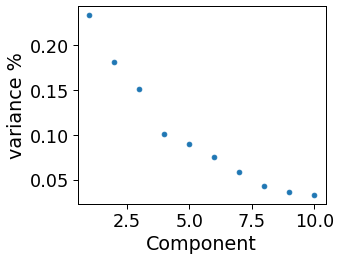

In [22]:
sns.set_context("paper", font_scale = 2)
fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(1,11), np.array(pd.read_csv('../data/data_results/gradient/group_grad_LL_lambdas.csv',
                                             header=None))[:,1])
ax.set_xlabel('Component')
ax.set_ylabel('variance %')
fig.tight_layout()
fig.savefig('../figures/fig_1_variance.svg')

In [23]:
from scipy.stats import pearsonr, spearmanr
import os
path = ('../data/data_results/gradient/LL/')
path_list = os.listdir(path)
path_list.sort()

### get the mean gradient scores for each parcel across subjects

In [24]:
ll = [None]*1014
rr = [None]*1014
lr = [None]*1014
rl = [None]*1014
for i in range(1014):
    ll[i] = np.array(pd.read_csv(path+path_list[i],header = None))
    rr[i] = np.array(pd.read_csv('../data/data_results/gradient/RR/'+path_list[i],header=None))
    lr[i] = np.array(pd.read_csv('../data/data_results/gradient/LR/'+path_list[i],header=None))
    rl[i] = np.array(pd.read_csv('../data/data_results/gradient/RL/'+path_list[i],header=None))

In [26]:
import statistics
ll_mean_g1 = [None]*180
ll_mean_g2 = [None]*180
ll_mean_g3 = [None]*180
rr_mean_g1 = [None]*180
rr_mean_g2 = [None]*180
rr_mean_g3 = [None]*180
lr_mean_g1 = [None]*180
lr_mean_g2 = [None]*180
lr_mean_g3 = [None]*180
rl_mean_g1 = [None]*180
rl_mean_g2 = [None]*180
rl_mean_g3 = [None]*180
for i in range(180):
    ll_mean_g1[i] = statistics.mean(np.array(ll)[:,i][:,0])
    ll_mean_g2[i] = statistics.mean(np.array(ll)[:,i][:,1])
    ll_mean_g3[i] = statistics.mean(np.array(ll)[:,i][:,2])
    rr_mean_g1[i] = statistics.mean(np.array(rr)[:,i][:,0])
    rr_mean_g2[i] = statistics.mean(np.array(rr)[:,i][:,1])
    rr_mean_g3[i] = statistics.mean(np.array(rr)[:,i][:,2])
    lr_mean_g1[i] = statistics.mean(np.array(lr)[:,i][:,0])
    lr_mean_g2[i] = statistics.mean(np.array(lr)[:,i][:,1])
    lr_mean_g3[i] = statistics.mean(np.array(lr)[:,i][:,2])
    rl_mean_g1[i] = statistics.mean(np.array(rl)[:,i][:,0])
    rl_mean_g2[i] = statistics.mean(np.array(rl)[:,i][:,1])
    rl_mean_g3[i] = statistics.mean(np.array(rl)[:,i][:,2])

In [27]:
[spearmanr(ll_mean_g1,rr_mean_g1),
 spearmanr(ll_mean_g2,rr_mean_g2),
 spearmanr(ll_mean_g3,rr_mean_g3),
 spearmanr(lr_mean_g1,rl_mean_g1),
 spearmanr(lr_mean_g2,rl_mean_g2),
 spearmanr(lr_mean_g3,rl_mean_g3)]

[SpearmanrResult(correlation=0.980773069127648, pvalue=2.956196389733649e-128),
 SpearmanrResult(correlation=0.9835077214317314, pvalue=3.9161233268631126e-134),
 SpearmanrResult(correlation=0.9389549060156177, pvalue=2.0873552195756393e-84),
 SpearmanrResult(correlation=0.9632025679804932, pvalue=1.6744355335293864e-103),
 SpearmanrResult(correlation=0.9713303908556848, pvalue=5.40423928326958e-113),
 SpearmanrResult(correlation=0.9537393129417574, pvalue=7.717111425314974e-95)]

## intra-hemisphere comparisons

#### scatter plot of G1 (LL) vs G1 (RR)

[SpearmanrResult(correlation=0.980773069127648, pvalue=2.956196389733649e-128),
 0.000999000999000999]

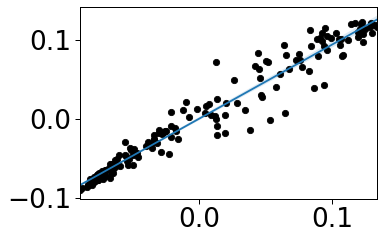

In [28]:
sns.set_context("paper", font_scale = 3)
x, y = ll_mean_g1,rr_mean_g1
f = sns.regplot(x,y,scatter_kws={'s': 1})

f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/fig_1_corr_llrr_g1.svg')

p_value = permutation_test(x, y, method='approximate', num_rounds=1000,
                           func=lambda x, y: np.array(spearmanr(x,y)[0]))

[spearmanr(x,y), p_value]

#### scatter plot of G2 (LL) vs G2 (RR)

[SpearmanrResult(correlation=0.9835077214317314, pvalue=3.9161233268631126e-134),
 0.000999000999000999]

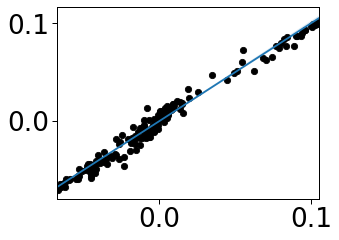

In [29]:
sns.set_context("paper", font_scale = 3)
x, y = ll_mean_g2,rr_mean_g2
f = sns.regplot(x,y,scatter_kws={'s': 1})
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/fig_1_corr_llrr_g2.svg')
p_value = permutation_test(x, y, method='approximate', num_rounds=1000,
                           func=lambda x, y: np.array(spearmanr(x,y)[0]))

[spearmanr(x,y), p_value]

#### scatter plot of G3 (LL) vs G3 (RR)

[SpearmanrResult(correlation=0.9389549060156177, pvalue=2.0873552195756393e-84),
 0.000999000999000999]

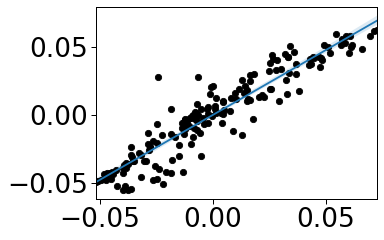

In [30]:
sns.set_context("paper", font_scale = 3)
x, y = ll_mean_g3,rr_mean_g3
f = sns.regplot(x,y,scatter_kws={'s': 1})
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/fig_1_corr_llrr_g3.svg')
p_value = permutation_test(x, y, method='approximate', num_rounds=1000,
                           func=lambda x, y: np.array(spearmanr(x,y)[0]))

[spearmanr(x,y), p_value]

## inter-hemisphere comparisons

#### scatter plot of G1 (LR) vs G1 (RL)

[SpearmanrResult(correlation=0.9632025679804932, pvalue=1.6744355335293864e-103),
 0.000999000999000999]

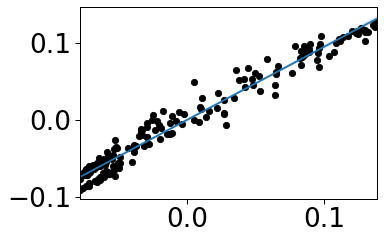

In [32]:
sns.set_context("paper", font_scale = 3)
x, y = lr_mean_g1,rl_mean_g1
f = sns.regplot(x,y,scatter_kws={'s': 1})
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/fig_1_corr_lrrl_g1.svg')
p_value = permutation_test(x, y, method='approximate', num_rounds=1000,
                           func=lambda x, y: np.array(spearmanr(x,y)[0]))

[spearmanr(x,y), p_value]

#### scatter plot of G2 (LR) vs G2 (RL)

[SpearmanrResult(correlation=0.9713303908556848, pvalue=5.40423928326958e-113),
 0.000999000999000999]

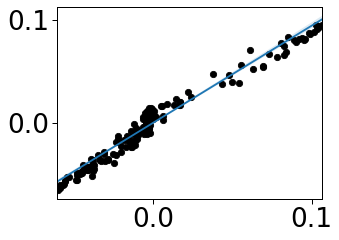

In [34]:
sns.set_context("paper", font_scale = 3)
x, y = lr_mean_g2,rl_mean_g2
f = sns.regplot(x,y,scatter_kws={'s': 1})
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/fig_1_corr_lrrl_g2.svg')
p_value = permutation_test(x, y, method='approximate', num_rounds=1000,
                           func=lambda x, y: np.array(spearmanr(x,y)[0]))

[spearmanr(x,y), p_value]

#### scatter plot of G3 (LR) vs G3 (RL)

[SpearmanrResult(correlation=0.9537393129417574, pvalue=7.717111425314974e-95),
 (0.956694400462812, 2.472247286529603e-97),
 0.000999000999000999]

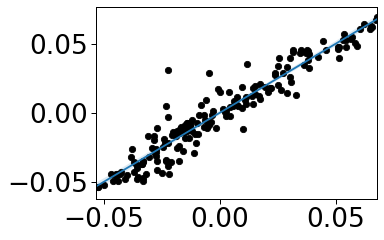

In [35]:
sns.set_context("paper", font_scale = 3)
x, y = lr_mean_g3,rl_mean_g3
f = sns.regplot(x,y,scatter_kws={'s': 1})
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/fig_1_corr_lrrl_g3.svg')
p_value = permutation_test(x, y, method='approximate', num_rounds=1000,
                           func=lambda x, y: np.array(spearmanr(x,y)[0]))

[spearmanr(x,y),pearsonr(x,y), p_value]